<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/scipy_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

#####***Install Some Packages***

In [ ]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####***Import Basic Modules***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

###***Chapter 1 Distribution***

####***Section 1 Normal Distribution***

#####***Method - rvs***

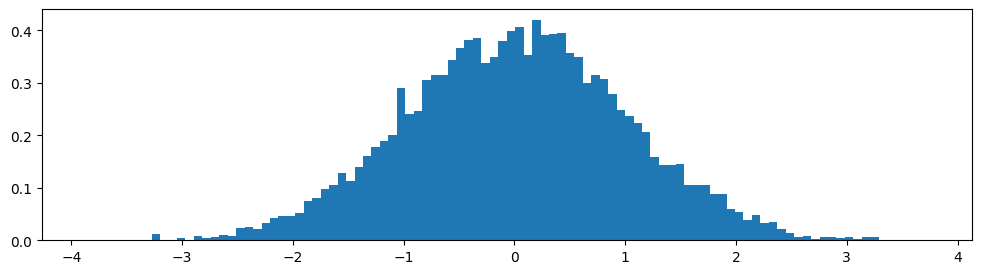

In [ ]:
def main():    
    mu = 0
    sigma = 1

    n_smaples = 10_000
    data = stats.norm(loc=mu,scale=sigma).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=100,density=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pdf***

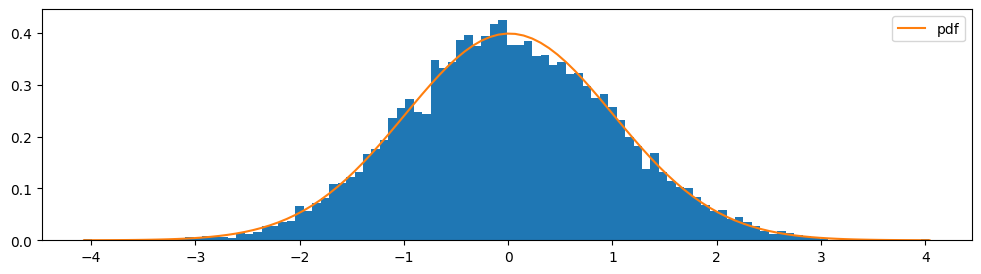

In [ ]:
def main():
    mu = 0
    sigma = 1

    n_smaples = 10_000
    data = stats.norm(loc=mu,scale=sigma).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()

#####***Method - cdf***

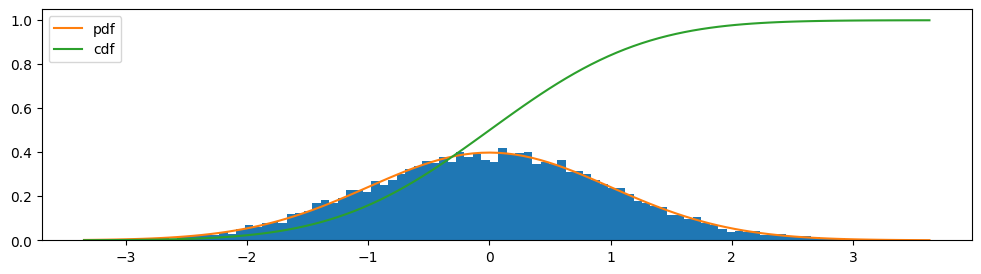

In [ ]:
def main():
    mu = 0
    sigma = 1

    n_smaples = 10_000
    data = stats.norm(loc=mu,scale=sigma).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    cdf_at_bins_ = stats.norm(loc=mu,scale=sigma).cdf(bins_)
    ax.plot(bins_, cdf_at_bins_, label='cdf')

    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 Multivariate Normal Distribution***

#####***Method - rvs***

x.shape = (10000, 2)


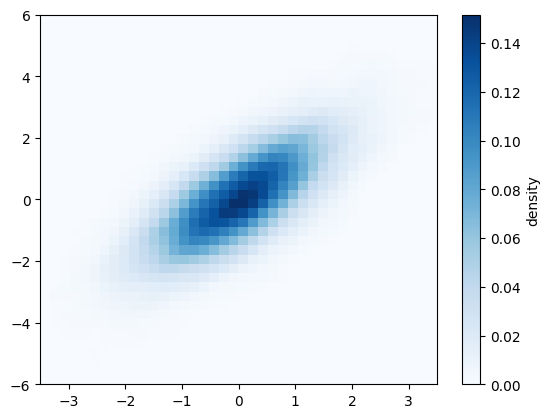

In [ ]:
def main():
    mean = [0, 0]
    cov = [[1, 1], [1, 2]]
    x = stats.multivariate_normal(mean, cov).rvs(10000)
    print(f"{x.shape = }")

    kde = stats.gaussian_kde(x.T)

    # evaluate on a regular grid
    x_ = np.linspace(-3.5, 3.5, 40) # (40,)
    y_ = np.linspace(-6, 6, 40)     # (40,)
    X, Y = np.meshgrid(x_, y_)      # (40, 40)
    XY = np.vstack([X.ravel(), Y.ravel()]) # (2, 1600)

    Z = kde.evaluate(XY).reshape(X.shape) # (40, 40)

    fig, ax = plt.subplots()
    a = ax.imshow(Z,
                  origin='lower', 
                  aspect='auto',
                  extent=[-3.5, 3.5, -6, 6],
                  cmap='Blues')
    plt.colorbar(a, label="density")
    plt.show()
    
if __name__ == "__main__":
    main()

####***Section 3 Binomial Distribution***

#####***Method - rvs***

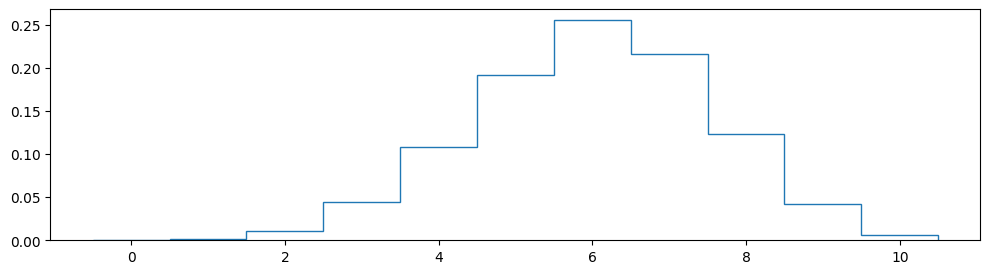

In [ ]:
def main():
    n = 10 
    p = 0.6

    n_smaples = 10_000
    data = stats.binom(n,p).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(n+2)-0.5,density=True,histtype='step')
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pmf***

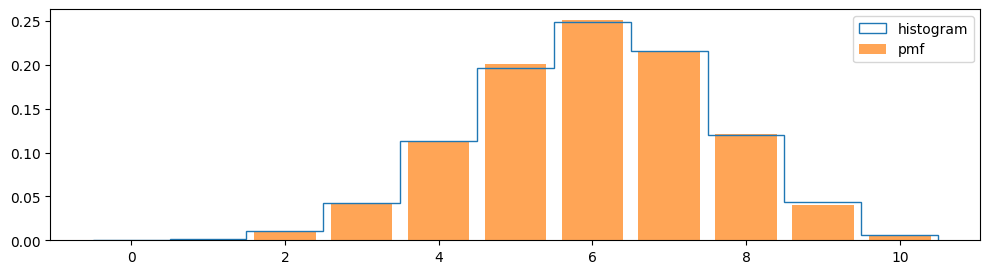

In [ ]:
def main():
    n = 10 
    p = 0.6 

    n_smaples = 10_000
    data = stats.binom(n,p).rvs(n_smaples)

    x = np.arange(n+1)
    pmf_x = stats.binom(n,p).pmf(x) 

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(n+2)-0.5,density=True,histtype='step',label='histogram')
    ax.bar(x,pmf_x,label='pmf',alpha=0.7)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - cmf***

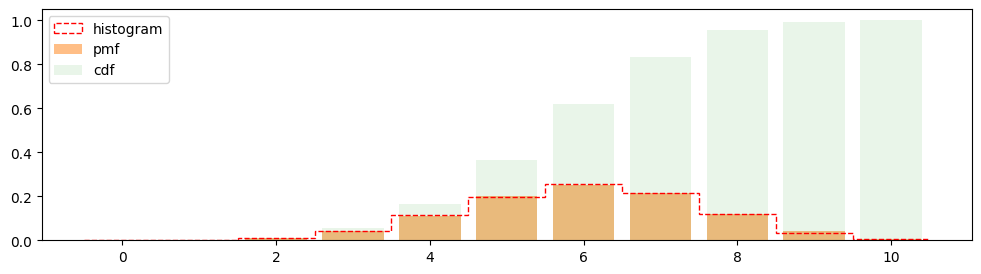

In [ ]:
def main():
    n = 10 
    p = 0.6 

    n_smaples = 10_000
    data = stats.binom(n,p).rvs(n_smaples)

    x = np.arange(n+1)
    pmf_x = stats.binom(n,p).pmf(x) 
    cdf_x = stats.binom(n,p).cdf(x)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(n+2)-0.5,density=True,histtype='step',label='histogram',lw=1,ls='--',color='r')
    ax.bar(x,pmf_x,label='pmf',alpha=0.5)
    ax.bar(x,cdf_x,label='cdf',alpha=0.1)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 4 Poisson Distribution***

#####***Method - rvs***

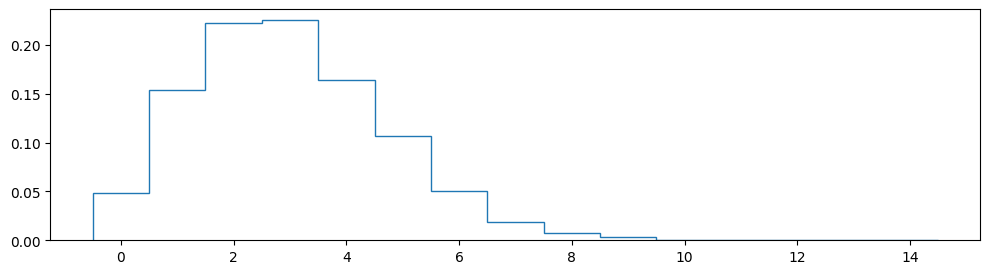

In [ ]:
def main():
    la = 3.0 

    n_smaples = 10_000
    data = stats.poisson(la).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(5*la+1)-0.5,density=True,histtype='step')
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pmf***

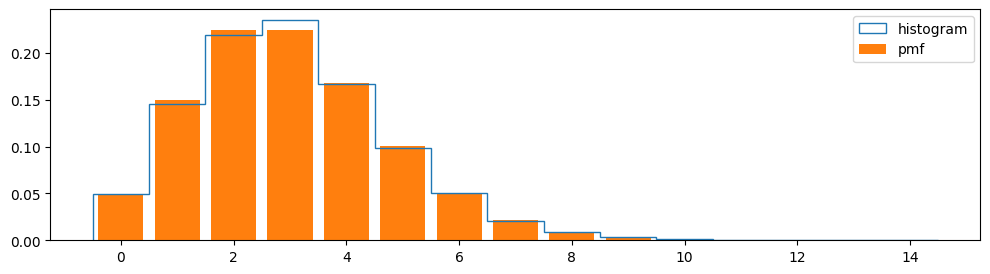

In [ ]:
def main():
    la = 3.0 

    n_smaples = 10_000
    data = stats.poisson(la).rvs(n_smaples)

    x = np.arange(5*la)
    pmf_x = stats.poisson(la).pmf(x) 

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(5*la+1)-0.5,density=True,histtype='step',label='histogram')
    ax.bar(x,pmf_x,label='pmf')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - cdf***

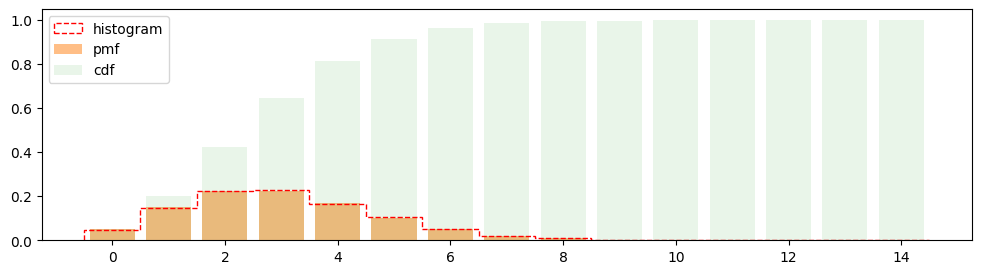

In [ ]:
def main():
    la = 3.0 

    n_smaples = 10_000
    data = stats.poisson(la).rvs(n_smaples)

    x = np.arange(5*la)
    pmf_x = stats.poisson(la).pmf(x) 
    cdf_x = stats.poisson(la).cdf(x) 

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=np.arange(5*la+1)-0.5,density=True,histtype='step',label='histogram',lw=1,ls='--',color='r')
    ax.bar(x,pmf_x,label='pmf',alpha=0.5)
    ax.bar(x,cdf_x,label='cdf',alpha=0.1)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 5 Exponential Distribution***

#####***Method - rvs***

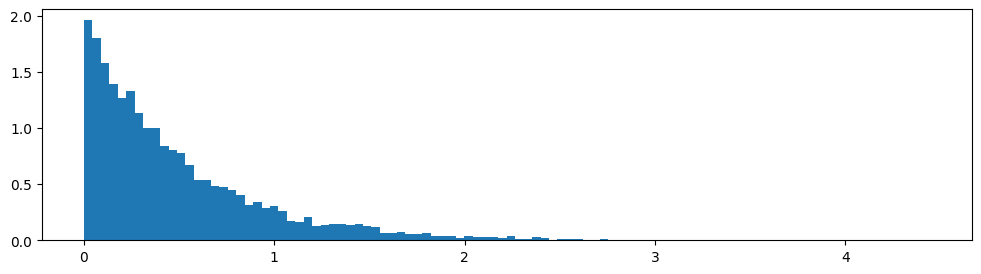

In [ ]:
def main():
    la = 2.0
    bt = 1 / la

    n_smaples = 10_000
    data = stats.expon(scale=bt).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=100,density=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pdf***

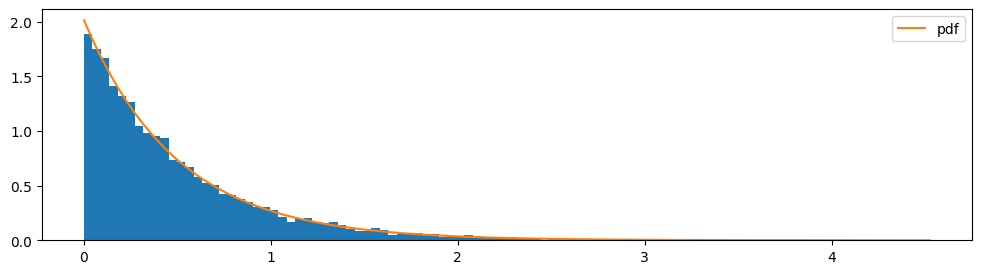

In [ ]:
def main():
    la = 2.0
    bt = 1 / la

    n_smaples = 10_000
    data = stats.expon(scale=bt).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.expon(scale=mu).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    ax.legend()
    
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - cdf***

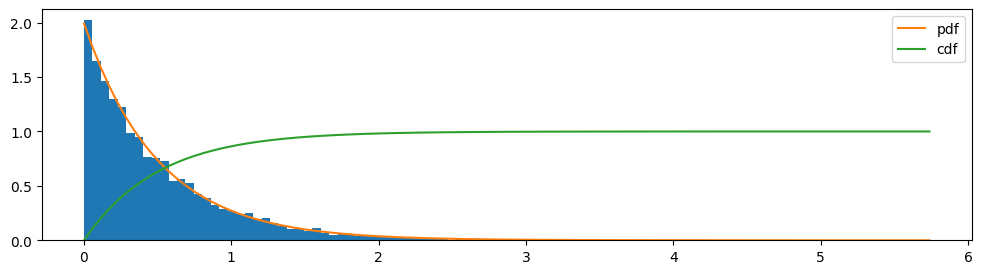

In [ ]:
def main():
    la = 2.0
    bt = 1 / la

    n_smaples = 10_000
    data = stats.expon(scale=bt).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.expon(scale=mu).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    bins_ = np.concatenate((np.array([0]), bins_))
    cdf_at_bins_ = stats.expon(scale=mu).cdf(bins_)
    ax.plot(bins_, cdf_at_bins_, label='cdf')

    ax.legend()
    
    plt.show()

if __name__ == "__main__":
    main()

####***Section 6 Chi Square Distribution***

#####***Method - rvs***

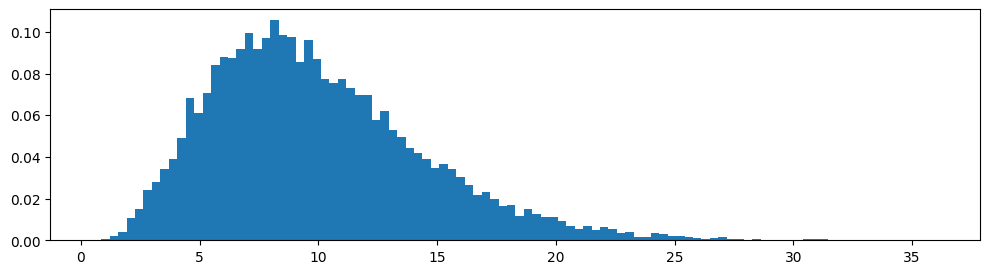

In [ ]:
def main():
    df = 10

    n_smaples = 10_000
    data = stats.chi2(df).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=100,density=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pdf***

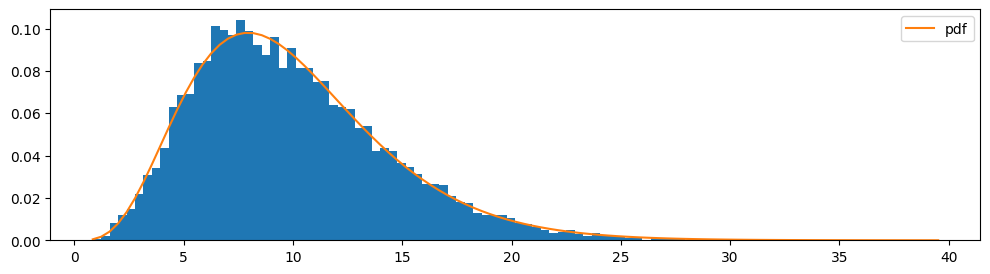

In [ ]:
def main():
    df = 10

    n_smaples = 10_000
    data = stats.chi2(df).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.chi2(mu).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    ax.legend()
    
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - cdf***

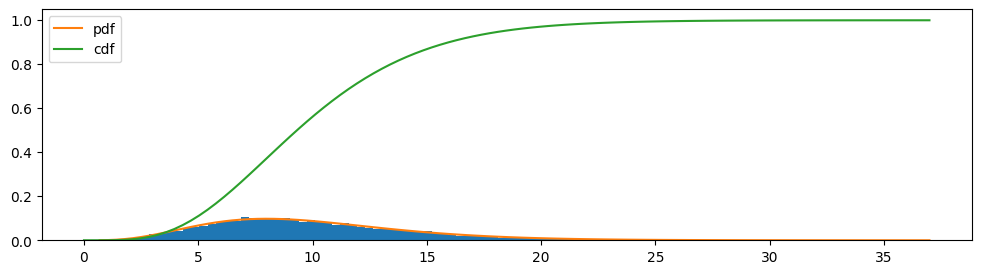

In [ ]:
def main():
    df = 10

    n_smaples = 10_000
    data = stats.chi2(df).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.chi2(mu).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    bins_ = np.concatenate((np.array([0]), bins_))
    cdf_at_bins_ = stats.chi2(mu).cdf(bins_)
    ax.plot(bins_, cdf_at_bins_, label='cdf')

    ax.legend()
    
    plt.show()

if __name__ == "__main__":
    main()

###***Chapter 2 Kernel Density Estimation***

#####***1D Gaussian Kernel Density Estimation***

data.shape = (50,)


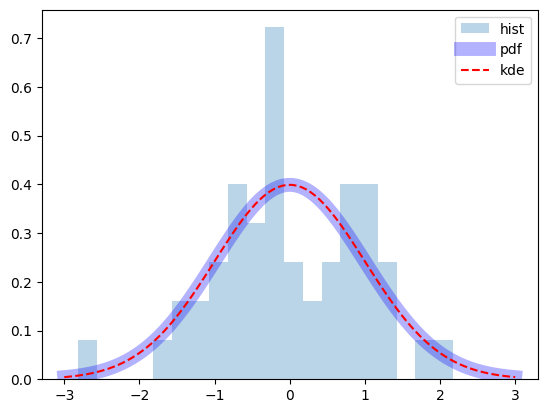

In [ ]:
def main():
    mu = 0
    sigma = 1

    n_smaples = 50
    data = stats.norm(loc=mu,scale=sigma).rvs(n_smaples)
    print(f"{data.shape = }")

    # evaluate on a regular grid
    x = np.linspace(-3,3,100) 
    pdf = stats.norm(loc=mu,scale=sigma).pdf(x) 
    kde = stats.gaussian_kde(x).evaluate(x) 

    fig, ax = plt.subplots()
    ax.hist(data,bins=20,density=True,alpha=0.3,label='hist')
    ax.plot(x,pdf,label="pdf",alpha=0.3,c='b',lw=10)
    ax.plot(x,pdf,'--r',label="kde")
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    main()

#####***2D Gaussian Kernel Density Estimation***

x.shape = (10000, 2)


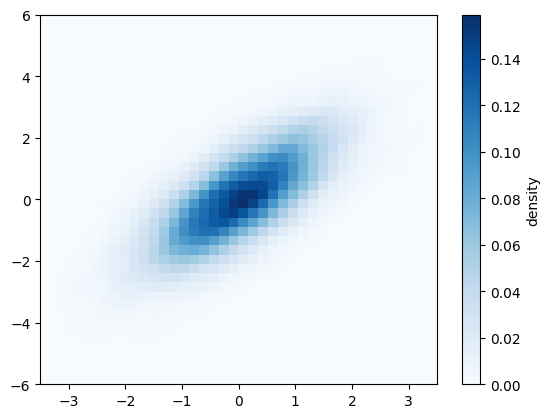

In [ ]:
def main():
    mean = [0, 0]
    cov = [[1, 1], [1, 2]]
    x = stats.multivariate_normal(mean, cov).rvs(10_000)
    print(f"{x.shape = }")

    kde = stats.gaussian_kde(x.T)

    # evaluate on a regular grid
    x_ = np.linspace(-3.5, 3.5, 40) # (40,)
    y_ = np.linspace(-6, 6, 40)     # (40,)
    X, Y = np.meshgrid(x_, y_)      # (40, 40)
    XY = np.vstack([X.ravel(), Y.ravel()]) # (2, 1600)

    Z = kde.evaluate(XY).reshape(X.shape) # (40, 40)

    fig, ax = plt.subplots()
    a = ax.imshow(Z,
                  origin='lower', 
                  aspect='auto',
                  extent=[-3.5, 3.5, -6, 6],
                  cmap='Blues')
    plt.colorbar(a, label="density")
    plt.show()
    
if __name__ == "__main__":
    main()

###***Chapter 3 Method***

#####***Method - describe***

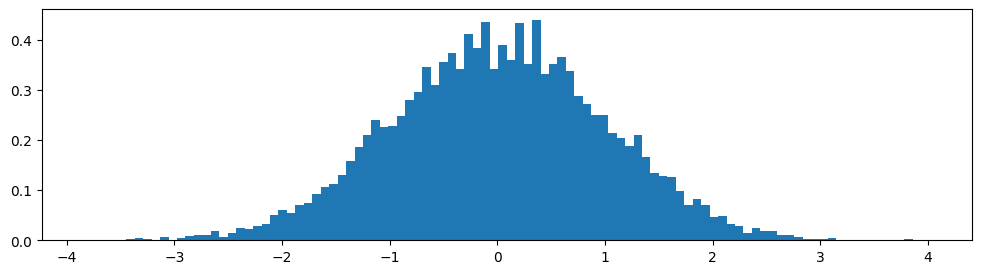

DescribeResult(nobs=10000, minmax=(-3.8388262298038818, 4.011852099610905), mean=0.010805299755655124, variance=0.9897752747987009, skewness=-0.016940692774035312, kurtosis=-0.024659409072757654)


In [ ]:
def main():    
    mu = 0
    sigma = 1

    n_smaples = 10_000
    data = stats.norm(loc=mu,scale=sigma).rvs(n_smaples)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.hist(data,bins=100,density=True)
    plt.show()

    print(stats.describe(data))

if __name__ == "__main__":
    main()